In [4]:
# 生成假数据
import pandas as pd

data = pd.read_excel(r'E:\Programing\PycharmProjects\2022MCM-B\Q1\数据\banner.xlsx')
data

,时间（年）,估计犀牛数量,最大犀牛数量,最小犀牛数量,最大可能犀牛数量,最小可能犀牛数量
0,1988,20,21,19,25,15
1,1989,22,23,21,29,17
2,1990,25,27,23,32,19
3,1991,28,30,25,35,20
4,1992,30,32,28,36,23
5,1993,32,35,30,38,25
6,1994,33,36,30,39,26
7,1995,32,38,29,41,26
8,1996,29,37,26,44,23
9,1997,33,35,25,44,22


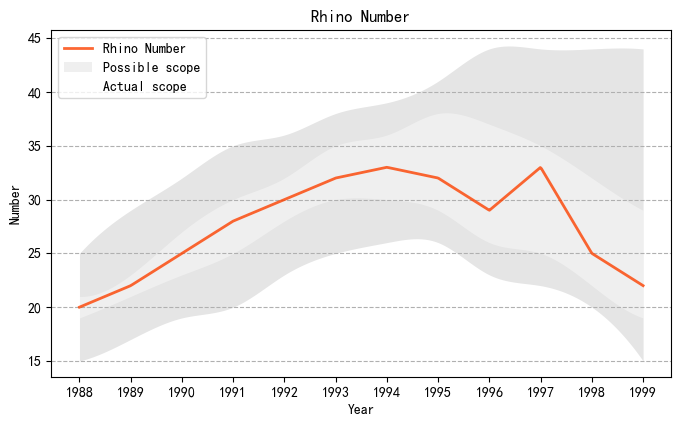

In [23]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, interp1d

plt.rcParams['font.family'] = 'SimHei'

import numpy as np
import pandas as pd


def smooth_xy(x_value: np.ndarray, y_value: np.ndarray, funSmooth):
    model = funSmooth(x_value, y_value)
    x_smooth = np.linspace(x_value.min(), x_value.max(), 500)
    y_smooth = model(x_smooth)
    return x_smooth, y_smooth


x = data['时间（年）']
y = data['估计犀牛数量']
yMax = data['最大犀牛数量']
yMin = data['最小犀牛数量']
yMaxMaybe = data['最大可能犀牛数量']
yMinMaybe = data['最小可能犀牛数量']

# 平滑处理
_, yMax = smooth_xy(x, yMax, make_interp_spline)
_, yMin = smooth_xy(x, yMin, make_interp_spline)
_, yMaxMaybe = smooth_xy(x, yMaxMaybe, make_interp_spline)
_, yMinMaybe = smooth_xy(x, yMinMaybe, make_interp_spline)
x, y = smooth_xy(x, y, interp1d)

# plot
fig, ax = plt.subplots(figsize=(8, 4.5))

# 画图--------------------
# 可能范围
ax.fill_between(x, yMaxMaybe, yMinMaybe, alpha=.1, linewidth=0, label='Possible scope', color='black')
# 实际范围
ax.fill_between(x, yMax, yMin, alpha=.4, linewidth=0, label='Actual scope', color='white')
ax.plot(x, y, linewidth=2, alpha=.8, label='Rhino Number', color='#fc4100')
# 画图结束----------------------

ax.set(xlabel='Year', ylabel='Number', title='Rhino Number',
       xticks=data['时间（年）'])
ax.legend(loc='upper left')
legs = ax.get_legend()
legs.legendHandles[1].set_color('#efefef')
ax.grid(axis='y', linestyle='--')
ax.grid(axis='x', linestyle='')

plt.savefig('Rhino Number.svg')
plt.show()